# Week 2, Fri, 4/11

In [ ]:
import numpy as np
import seaborn as sns

N = 10000

x = np.random.uniform(-1,1,N)
np.var(x)

0.3272975013703894

In [15]:
y = np.random.randint(0,2,N)
y = y*2-1
np.var(y)

0.9996236400000004

<Axes: ylabel='Density'>

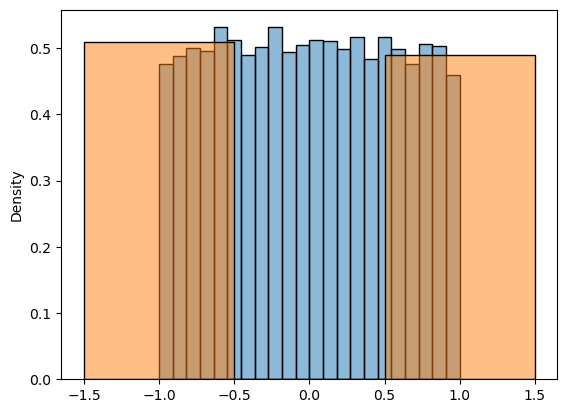

In [16]:
sns.histplot(x, alpha=0.5, stat='density')
sns.histplot(y, alpha=0.5, stat='density',discrete=True)

In [33]:
np.corrcoef(x, y)

array([[1.        , 0.98840774],
       [0.98840774, 1.        ]])

In [29]:
n = 100

x = np.random.uniform(-1,1,n)
y = x + np.random.normal(0, 0.1, n)
z = np.random.uniform(-1,1,n)


np.cov(x,y)
cov_xy = np.cov(x, y)[0, 1]
cov_xz = np.cov(x, z)[0, 1]

corr_xy = np.corrcoef(x, y)[0, 1]
corr_xz = np.corrcoef(x, z)[0, 1]


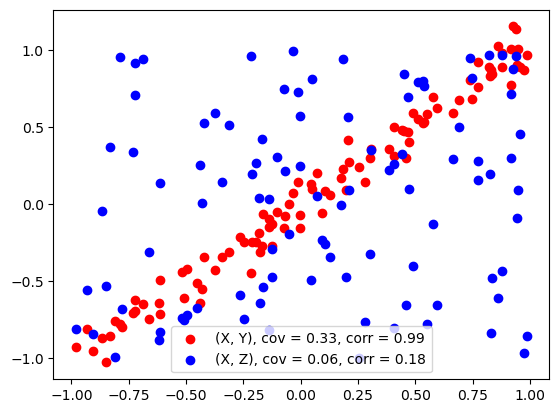

In [31]:

from matplotlib import pyplot as plt
fig, ax = plt.subplots()
# plot x vs y and x vs z, different colors, show name
ax.scatter(x, y, color='red', label='(X, Y), cov = %.2f, corr = %.2f' % (cov_xy, corr_xy))
ax.scatter(x, z, color='blue', label='(X, Z), cov = %.2f, corr = %.2f' % (cov_xz, corr_xz))
ax.legend()
plt.show()


In [36]:
n = 10000
x = np.random.uniform(-1,1,n)
y = x**2
np.corrcoef(x,y)

array([[1.       , 0.0064884],
       [0.0064884, 1.       ]])

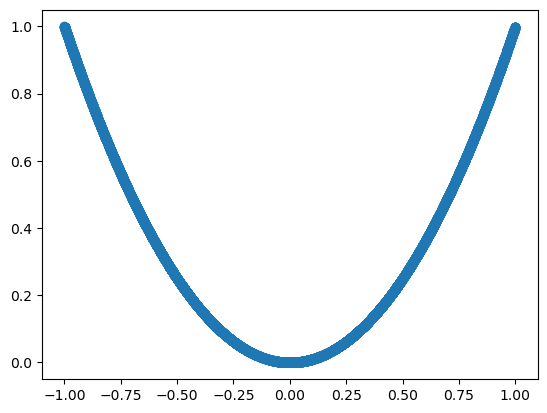

In [37]:
plt.scatter(x, y)

<Axes: ylabel='Density'>

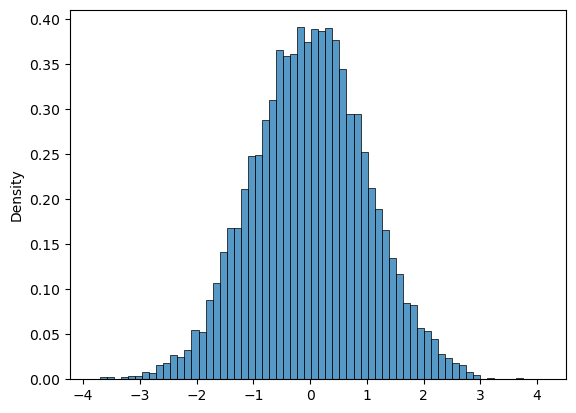

In [39]:
x = np.random.randn(10000)
sns.histplot(x, stat='density')

In [40]:
np.var(x)

1.0210947190379804

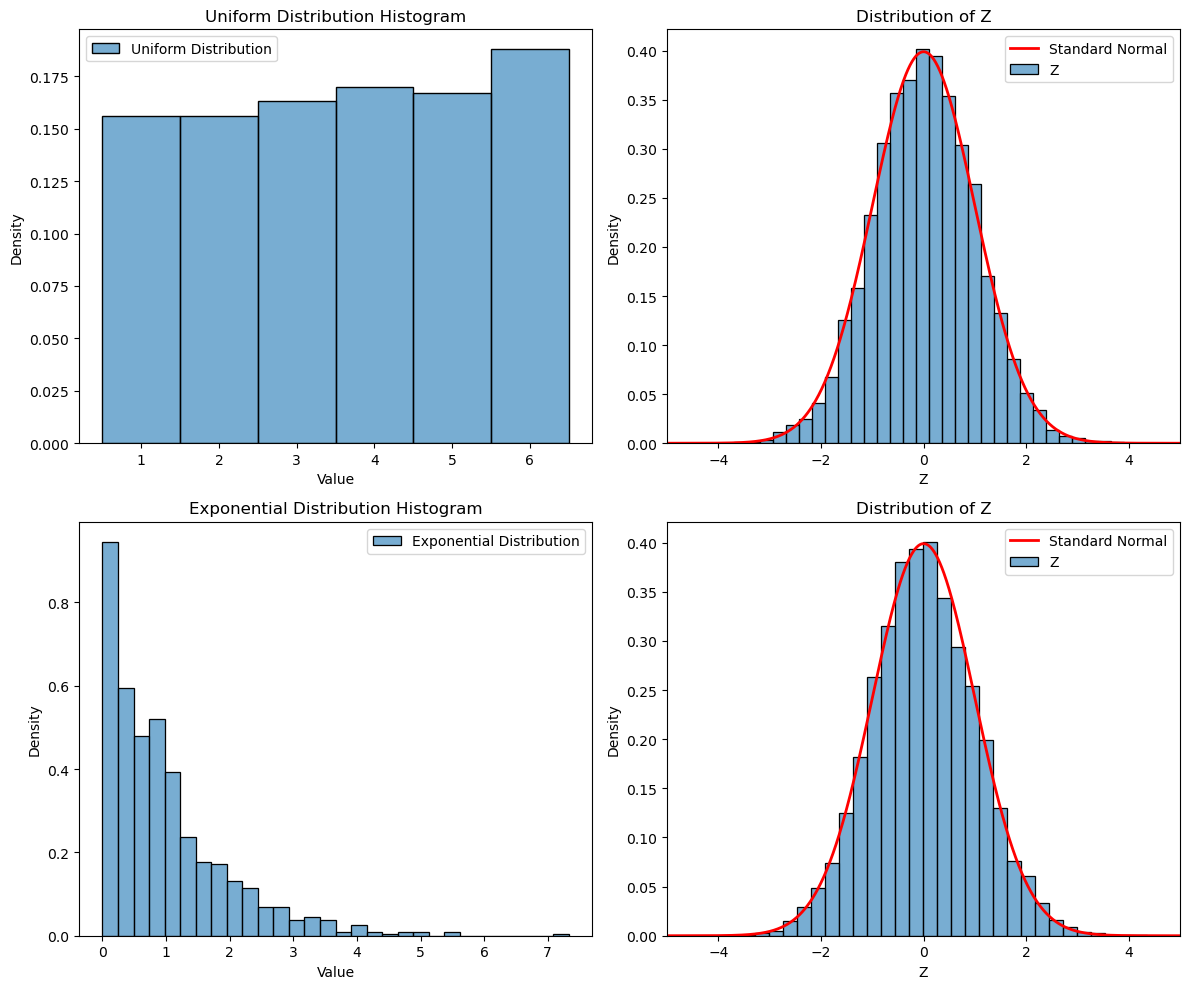

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Gaussian density function
gaussian_density = lambda x, mu, sigma: (1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2)))

# Parameters
N = 10000  # number of experiments
n = 1000   # number of samples per experiment

# Uniform Distribution
mu_uniform = (6 + 1) / 2  # mean of uniform distribution over [1, 6]
sigma_uniform = np.sqrt(((6 - 1 + 1) ** 2 - 1) / 12)  # standard deviation of uniform distribution over [1, 6]

uniform_samples = np.random.randint(1, 7, n)  # draw n samples from uniform integer distribution between 1 and 6
z_samples_uniform = []
for i in range(N):
    x = np.random.randint(1, 7, n)
    sample_mean = np.mean(x)
    z = np.sqrt(n) * (sample_mean - mu_uniform) / sigma_uniform
    z_samples_uniform.append(z)

# Exponential Distribution
lambda_exp = 1  # rate parameter for exponential distribution
mu_exp = 1 / lambda_exp
sigma_exp = 1 / lambda_exp

exp_samples = np.random.exponential(1 / lambda_exp, n)  # draw n samples from exponential distribution with rate 1
z_samples_exp = []
for i in range(N):
    x = np.random.exponential(1 / lambda_exp, n)
    sample_mean = np.mean(x)
    z = np.sqrt(n) * (sample_mean - mu_exp) / sigma_exp
    z_samples_exp.append(z)

# Plotting in 2-by-2 subfigures
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot original Uniform Distribution
sns.histplot(uniform_samples, discrete=True, kde=False, ax=axs[0, 0], edgecolor='black', stat='density', alpha=0.6, label='Uniform Distribution')
axs[0, 0].set_xlabel('Value')
axs[0, 0].set_ylabel('Density')
axs[0, 0].set_title('Uniform Distribution Histogram')
axs[0, 0].legend()

# Plot histogram of Z-transformed Uniform Distribution
sns.histplot(z_samples_uniform, bins=30, kde=False, ax=axs[0, 1], edgecolor='black', stat='density', alpha=0.6, label='Z')
x = np.linspace(-5, 5, 1000)
y = gaussian_density(x, 0, 1)
axs[0, 1].plot(x, y, linewidth=2, color='r', label='Standard Normal')
axs[0, 1].set_xlim(-5, 5)
axs[0, 1].set_xlabel('Z')
axs[0, 1].set_ylabel('Density')
axs[0, 1].set_title('Distribution of Z')
axs[0, 1].legend()

# Plot original Exponential Distribution
sns.histplot(exp_samples, bins=30, kde=False, ax=axs[1, 0], edgecolor='black', stat='density', alpha=0.6, label='Exponential Distribution')
axs[1, 0].set_xlabel('Value')
axs[1, 0].set_ylabel('Density')
axs[1, 0].set_title('Exponential Distribution Histogram')
axs[1, 0].legend()

# Plot histogram of Z-transformed Exponential Distribution
sns.histplot(z_samples_exp, bins=30, kde=False, ax=axs[1, 1], edgecolor='black', stat='density', alpha=0.6, label='Z')
axs[1, 1].plot(x, y, linewidth=2, color='r', label='Standard Normal')
axs[1, 1].set_xlim(-5, 5)
axs[1, 1].set_xlabel('Z')
axs[1, 1].set_ylabel('Density')
axs[1, 1].set_title('Distribution of Z')
axs[1, 1].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()